# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

**By: Braiden Hook**


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [155]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [156]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'north'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [157]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [158]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: west
step 2 - action: west
step 3 - action: north
step 4 - action: west
step 5 - action: north
step 6 - action: west
step 7 - action: suck
step 8 - action: south
step 9 - action: suck
step 10 - action: suck
step 11 - action: west
step 12 - action: east
step 13 - action: west
step 14 - action: suck
step 15 - action: suck
step 16 - action: suck
step 17 - action: south
step 18 - action: east
step 19 - action: east


7

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

### My Description

The environment takes 4 parameters, similar to simple_environment it takes an agent, max_steps, and verbose. However, it also takes "n" which defines the size of the environment. This made it easier to test in task 4.

The room initializes with clean and dirty squares. A square has a 20% chance of being dirty as defined in PEAS. All bumpers are initially set to false, they change to true if robot is found near the bumper.

Location of the robot is kept track of with (x_pos, y_pos). The bumpers will switch to true, based on this location.
- x_pos is 0 then the west bumper is true.
- y_pos is 0 then the north bumper is true.
- x_pos is n-1 then the east bumper is true.
- y_pos is n-1 then the south bumper is true.

The robot dirty sensor can pick up if a square is dirty by checking the room 2D array with index [y_pos][x_pos].

The environment will have the robot clean the room up until either the max number of steps is hit or the entire room is clean.

After receiving the action from the agent, the environment will then simulate the action. Meaning it will stay and place and clean if it receives the action "suck", or it will move a certain direction based on the action. If it is next to a bumper and the action is to run into the bumper, then the robot will stay in place as a way to show it hit the bumper.

The environment will tally the number of squares the robot cleans. When the robot cleans a square, that square in the room matrix will be put to false.

At the end, the environment will return the number of squares cleaned, as well as the number of steps taken (1 <= x <= max_steps).

In [231]:
# Your code and description goes here
import random

def environment(agent, max_steps, n = 5, verbose = True):
    
    # True == Dirty; False == Clean
    room = np.random.choice([True, False], size=(n,n), p = [.2, 1-.2])

    num_cleaned = 0
    
    # All bumpers initialized to false, will change to true based on (x_pos, y_pos)
    bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
    
    # Placing robot in random location inside the room
    x_pos = random.randint(0, n-1)
    y_pos = random.randint(0, n-1)
    
    print ("Robot Inital Location: (" + str(x_pos) + ", " + str(y_pos) + ")\n")
    
    print ("Room Before Cleaning:\n")
    print (room)
    print ()
    
    i = 0

    # Robot will continue to clean until it reaches the max number of steps or is fully clean
    while (i < max_steps and any(True in x for x in room)):
        
        dirty = room[y_pos][x_pos] # Check to see if current square is dirty
        
        # If else statements checking to see if robot is next to a bumper
        if x_pos == 0:
            bumpers["west"] = True
            bumpers["east"] = False
        elif x_pos == (n-1):
            bumpers["east"] = True
            bumpers["west"] = False
        else:
            bumpers["east"] = False
            bumpers["west"] = False
            
        if y_pos == 0:
            bumpers["north"] = True
            bumpers["south"] = False
        elif y_pos == (n-1):
            bumpers["south"] = True
            bumpers["north"] = False
        else:
            bumpers["south"] = False
            bumpers["north"] = False
        
        action = agent(bumpers, dirty) # Calling the agent
        
        # Simulating action based on the agent's decision
        if action != "suck":
            bumper = bumpers[action]
            if bumper:
                # if (verbose): print("step", i+1 , "- action:", action + "; hit bumper!")
                temp = 0
            else:
                # if (verbose): print("step", i+1 , "- action:", action)
                if action == "west": x_pos -= 1
                if action == "east": x_pos += 1
                if action == "north": y_pos -= 1
                if action == "south": y_pos += 1  
        else: 
            num_cleaned = num_cleaned + 1
            room[y_pos][x_pos] = False
            # if (verbose): print("step", i+1 , "- action:", action)
        
        # print ("Robot Location: (" + str(x_pos) + ", " + str(y_pos) + ")\n")
        i+=1
    
    print ("Room After Cleaning:\n")
    print (room)
        
    return num_cleaned, i

cleaned, steps = environment(simple_randomized_agent,20)

print ("\nNumber of Tiles Cleaned:", cleaned)
print ("Number of Total Steps:", steps)

Robot Inital Location: (2, 0)

Room Before Cleaning:

[[False  True False False False]
 [False False  True False False]
 [False False False  True False]
 [ True  True False False False]
 [False False False False False]]

Room After Cleaning:

[[False  True False False False]
 [False False  True False False]
 [False False False  True False]
 [ True  True False False False]
 [False False False False False]]

Number of Tiles Cleaned: 4
Number of Total Steps: 20


## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

### Description of my simple reflex agent
The simple reflex agent receives bumpers and dirty as parameter showing whether the square it is on is dirty or not, as well as if it is near a bumper. If the square isn't dirty, then the agent will randomly choose from the possible actions left which are all directions that don't have a bumper (any bumper that is false).

In [235]:
# Your code and description goes here

def simple_reflex_agent(bumpers, dirty):
    
    if dirty:
        return "suck"
    else:
        # Compiling a list of bumpers that are false and then randomly choosing among them.
        possible_actions = [k for k,v in bumpers.items() if not v]
        return np.random.choice(possible_actions)


cleaned,steps = environment(simple_reflex_agent,100)

print ("\nNumber of Tiles Cleaned:", cleaned)
print ("Number of Total Steps:", steps)

Robot Inital Location: (2, 3)

Room Before Cleaning:

[[False False  True False  True]
 [False  True False False False]
 [ True  True False  True False]
 [False False False False False]
 [False  True False False  True]]

Room After Cleaning:

[[False False False False  True]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]

Number of Tiles Cleaned: 7
Number of Total Steps: 100


## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

### Description of my model-based reflex agent and its state
For my implementation I decided to use global variables to keep track of the robot's current location. To find said location I had the robot navigate to the northwest corner. More specially, once initialized, the robot will move west until it reaches the bumper, there the state_x_pos is updated to 0. Then the robot will move north until it reaches the bumper and update state_x_pos to 0. Once our model has an understanding on where the robot is located, it will navigate the room in a snake pattern.

I implemented the snake pattern, by these set of rules:
- Location must be found first.
- Cleans a dirty square whenever found.
- For every even column the robot will navigate north to south until it reaches the south bumper.
- For every odd column the robot will navigate south to north until it reaches the north bumper.
- When it reaches either bumper, the robot will then move east once and continue vertical in the opposite way from the former column.

When it reaches the final corner of the room, the room will have been considered fully clean as it had covered every square and stopped to clean whenever a square was dirty. The environment will have the robot stop and not bump into the bumpers as the simulation will end when the room is fully clean.

In [237]:
# Your code goes here

state_x_pos = -1
state_y_pos = -1


def model_reflex_agent(bumpers, dirty):
    
    # Gathering global variables
    global state_x_pos
    global state_y_pos
    
    # print ("Robot State Location:", state_x_pos, state_y_pos)
    
    # Navigating to northwest corner
    if state_x_pos == -1:
        if bumpers["west"]:
            state_x_pos = 0
        else:
            return "west"
    if state_y_pos == -1:
        if bumpers["north"]:
            state_y_pos = 0
        else:
            return "north"
        
    # Navigating snake pattern
    if state_x_pos != -1 and state_y_pos != -1:
        # Clean if dirty
        if dirty:
            return "suck"
        else:
            # Check if column is even. If so will travel north to south until it hits the bumper
            # If column is odd it will travel south to north until it hits the bumper
            if (state_x_pos % 2) == 0:
                if bumpers["south"]:
                    state_x_pos += 1
                    return "east"
                else:
                    state_y_pos += 1
                    return "south"
            else:
                if bumpers["north"]:
                    state_x_pos += 1
                    return "east"
                else:
                    state_y_pos -= 1
                    return "north"

cleaned,steps = environment(model_reflex_agent,100)

print ("\nNumber of Tiles Cleaned:", cleaned)
print ("Number of Total Steps:", steps)

Robot Inital Location: (1, 1)

Room Before Cleaning:

[[False False  True False  True]
 [False False False False  True]
 [False False False  True False]
 [False False False False False]
 [False False False False False]]

Room After Cleaning:

[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]

Number of Tiles Cleaned: 4
Number of Total Steps: 27


## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

### How I performed the study
To perform the study, I found the average performance for each agent based on 100 runs. I also returned an array for each agent containing the amount of steps taken for each run. I set the max steps at 15,000 as even at 100,000 both random and reflex weren't able to finish cleaning the room.

In [276]:
# Your code goes here
def study (n):
    random_steps = float(0)
    reflex_steps = float(0)
    model_steps = float(0)
    random_steps_arr = []
    reflex_steps_arr = []
    model_steps_arr = []

    # Running the simulation 100 times for each agent in a room of size nxn
    for x in range(100):
        cleaned,steps = environment(simple_randomized_agent,15000, n)
        random_steps += steps
        random_steps_arr.append(steps)

        cleaned,steps = environment(simple_reflex_agent,15000, n)
        reflex_steps += steps
        reflex_steps_arr.append(steps)

        # Reset the global variables to -1 for each run
        globals()['state_x_pos'] = -1
        globals()['state_y_pos'] = -1
        cleaned,steps = environment(model_reflex_agent,15000, n)
        model_steps += steps
        model_steps_arr.append(steps)

        # print ("\nNumber of Tiles Cleaned:", cleaned)
        # print ("Number of Total Steps:", steps)
    random_steps /= 100
    reflex_steps /= 100
    model_steps /= 100
    return random_steps, reflex_steps, model_steps, random_steps_arr, reflex_steps_arr, model_steps_arr

In [277]:
%%capture
# Study results for a room of size 5x5
random_steps_5, reflex_steps_5, model_steps_5, random_steps_arr_5, reflex_steps_arr_5, model_steps_arr_5 = study(5)

In [278]:
%%capture
# Study results for a room of size 10x10
random_steps_10, reflex_steps_10, model_steps_10, random_steps_arr_10, reflex_steps_arr_10, model_steps_arr_10 = study(10)

In [279]:
%%capture
# Study results for a room of size 100x100
random_steps_100, reflex_steps_100, model_steps_100, random_steps_arr_100, reflex_steps_arr_100, model_steps_arr_100 = study(100)

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

In [280]:
import pandas as pd
df = pd.DataFrame({"Size": ["5x5", "10x10", "100x100"], 
           "Randomized Agent": [random_steps_5, random_steps_10, random_steps_100],
           "Simple Reflex Agent": [reflex_steps_5, reflex_steps_10, reflex_steps_100],
           "Model-based Reflex Agent": [model_steps_5, model_steps_10, model_steps_100]})
df = df.set_index("Size")
df

,Randomized Agent,Simple Reflex Agent,Model-based Reflex Agent
Size,,,
5x5,438.66,109.91,29.16
10x10,2983.85,848.44,124.43
100x100,15000.00,15000.00,12092.91


Add charts to compare the performance of the different agents.

In [281]:
# Your graphs and discussion of the results goes here

# Creating dataframes for all the steps taken each turn in 5x5 and 10x10

df_all_runs_5 = pd.DataFrame({"Random":random_steps_arr_5, "Reflex":reflex_steps_arr_5, "Model":model_steps_arr_5})
df_all_runs_10 = pd.DataFrame({"Random":random_steps_arr_10, "Reflex":reflex_steps_arr_10, "Model":model_steps_arr_10})


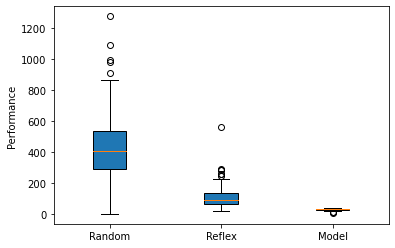

In [282]:
import matplotlib.pyplot as plt

bplot = plt.boxplot([random_steps_arr_5, reflex_steps_arr_5, model_steps_arr_5],
                    patch_artist = True, labels=["Random", "Reflex", "Model"])
plt.ylabel("Performance")
plt.show()

The box plot above is based on amount of steps taken for each of the 100 runs in a room of size 5x5.

As you can see, the Model agent is by far the most consistent in its results, as well as the most efficient as the average is the lowest among the 3. It also has the very little chance of having an outlier compared to Random and Reflex.

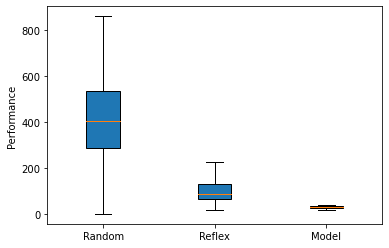

In [283]:
bplot = plt.boxplot([random_steps_arr_5, reflex_steps_arr_5, model_steps_arr_5],
                    patch_artist = True, labels=["Random", "Reflex", "Model"], showfliers=False)
plt.ylabel("Performance")
plt.show()

After taking out the outliers, you can see that Random and Reflex have the lowest possible steps. In that they had at least one run that took less steps than the run that took the least amount of steps in the Model agent.

Of course, such situations rarely happen, as both Random and Reflex's percentiles are far higher than Model's. You also can't just disregard the outliers as we did here (we only did so we could better view to box plots).

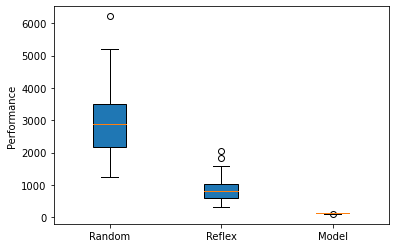

In [290]:
bplot = plt.boxplot([random_steps_arr_10, reflex_steps_arr_10, model_steps_arr_10],
                    patch_artist = True, labels=["Random", "Reflex", "Model"])
plt.ylabel("Performance")
plt.show()

The difference between Random, Reflex, and Model only increases as the room size gets bigger. Model stays consistent in it's results, however both Reflex and Random both have far higher percentiles, far higher than the 5x5 room.

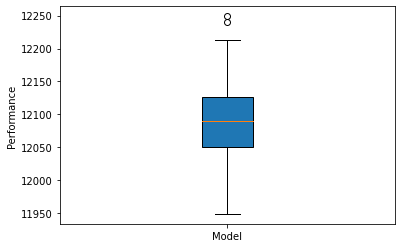

In [285]:
bplot = plt.boxplot([model_steps_arr_100], patch_artist = True, labels=["Model"])
plt.ylabel("Performance")
plt.show()

We can only view the Model agent for the 100x100 as Random and Reflex both could not get lower than 15,000. For the Model agent, you can see that it has a couple outliers, but for the most part it consistently stays within a certain range. Being the only one to accomplish being under 15,000 also proves its worth.

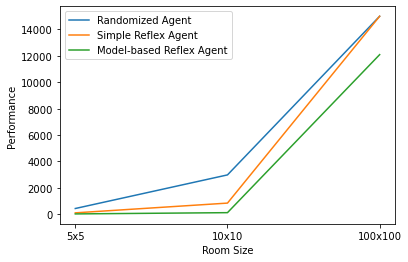

In [294]:
x = ["5x5", "10x10", "100x100"]

plt.plot(x, df["Randomized Agent"], label = "Randomized Agent") 
plt.plot(x, df["Simple Reflex Agent"], label = "Simple Reflex Agent") 
plt.plot(x, df["Model-based Reflex Agent"], label = "Model-based Reflex Agent") 
plt.xlabel("Room Size")
plt.ylabel("Performance")
plt.legend()
plt.show()

A line graph representing the averages at each room size for each agent. Model-based is the lowest in each room size making the conclusion rather simple to understand.

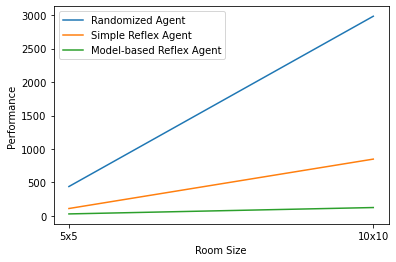

In [287]:
x = ["5x5", "10x10"]

plt.plot(x, df["Randomized Agent"].head(2), label = "Randomized Agent") 
plt.plot(x, df["Simple Reflex Agent"].head(2), label = "Simple Reflex Agent") 
plt.plot(x, df["Model-based Reflex Agent"].head(2), label = "Model-based Reflex Agent") 
plt.xlabel("Room Size")
plt.ylabel("Performance")
plt.legend()
plt.show()

Decided to create another line graph on just 5x5 and 10x10 to show the differences better (because we have already shown that Random and Reflex aren't viable at 100x100).

Simple Reflex is show to at the very least be a better option than Randomized. However, Model-based is for the most part the best option.

### Conclusion
As we have seen from this study, at all rooms sizes (5x5, 10x10, 100x100), the model-based agent is the best option to go with. There are cases in which Random and Reflex are faster than the model-based in small rooms, however the likelihood of an outlier (above the max) is far too risky in comparison to Model-based.

So, in conclusion, Model-based Reflex Agent is the most viable option.

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

### For Model-based Reflex
If the robot is put in a rectangular size room it should be able to perform just as well as it did in the square room. The only part that would need to be changed is allowing it so the environment can make a room of m x n size. However no changes will need to be made to the agent function.

If the cleaning area has an irregular shape then things could get worse. If the hallway is placed in either the northeast or southeast corner, then the robot could be able to navigate through it (though there is a chance the state position could get messed up). If the hallway is placed in the middle of the east (or west) bumper then the robot will never enter and the agent will continue in a continuous loop until max steps is reached. Has a possible chance of entering the hallway if it is placed on the north or south bumper. Hallway would need to be in the robots pathway, meaning if the robot was moving south, the hallway enterance would need to be in it's pathway. Same vice versa for when going north.

If the room contains obstacles, the robot will perform in different ways considering the placement. Let's say the robot is navigating south and hits an obstacle. In this case it will go east once, and then go north. This would end up missing what is underneath the obstacle on the initial row, as well as the rows under row that the robot was on when turning onto the new row to move out of the obstacles way. If the robot was moving east and hit an obstacle, then it would the state position would actually end up being thrown off causing the robot to go back north on an even row, and then go south on an odd row.

### For Simple Reflex
Simple Reflex in a rectangular room will perform similar to a square room. Still worse than the model-based.

If the room was an irregular shape it would actually perform better than the model-based as it has random movement and not a set path.

If there was obstacles in the room, the simple reflex will perform better than the model-based again due to its random path.

### For Random
Performs similar to the simple reflex in terms of path due to it's randomness. Will not see much change when moving to a rectangular room. As it has no set path it will not perform any different in a irregular shape room. Meaning it will at least have a chance of making it through the hallway as it would when it goes to any other square. Will not perform any different went it hits an obstacle.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

### Obstacle Environment
Made simple change to the original environment by adding obstacles. Instead of true/false, the labels are now "D" for dirty, "C" for clean, and "O" for obstacle. Obstacles have a 20% probability, dirty 20% as well, and clean 60%.

No changes had to be made to the agents to make this work.

In [324]:
# Your code and discussion goes here
def environment_2(agent, max_steps, n = 5, verbose = True):
    
    # D == Dirty; C == Clean; O == Obstacle
    room = np.random.choice(["D", "C", "O"], size=(n,n), p = [.2, 1-.4, .2])

    num_cleaned = 0
    
    # All bumpers initialized to false, will change to true based on (x_pos, y_pos)
    bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
    
    # Placing robot in random location inside the room
    x_pos = random.randint(0, n-1)
    y_pos = random.randint(0, n-1)
    
    print ("Robot Inital Location: (" + str(x_pos) + ", " + str(y_pos) + ")\n")
    
    print ("Room Before Cleaning:\n")
    print (room)
    print ()
    
    i = 0
    hit_bumper = 0

    # Robot will continue to clean until it reaches the max number of steps or is fully clean
    while (i < max_steps and any("D" in x for x in room)):
        
        # Check to see if current square is dirty
        if room[y_pos][x_pos] == "D":
            dirty = True
        else:
            dirty = False
        
        # If else statements checking to see if robot is next to a bumper
        if x_pos == 0:
            bumpers["west"] = True
            bumpers["east"] = False
        elif x_pos == (n-1):
            bumpers["east"] = True
            bumpers["west"] = False
        else:
            bumpers["east"] = False
            bumpers["west"] = False
            
        if y_pos == 0:
            bumpers["north"] = True
            bumpers["south"] = False
        elif y_pos == (n-1):
            bumpers["south"] = True
            bumpers["north"] = False
        else:
            bumpers["south"] = False
            bumpers["north"] = False
        
        if y_pos+1 < n and room[y_pos+1][x_pos] == "O":
            bumpers["south"] = True
        if y_pos-1 > -1 and room[y_pos-1][x_pos] == "O":
            bumpers["north"] = True
        if x_pos+1 < n and room[y_pos][x_pos+1] == "O":
            bumpers["east"] = True
        if x_pos-1 > -1 and room[y_pos][x_pos-1] == "O":
            bumpers["west"] = True
        action = agent(bumpers, dirty) # Calling the agent
        
        # Simulating action based on the agent's decision
        if action != "suck":
            bumper = bumpers[action]
            if bumper:
                # if (verbose): print("step", i+1 , "- action:", action + "; hit bumper!")
                hit_bumper +=1
            else:
                # if (verbose): print("step", i+1 , "- action:", action)
                if action == "west": x_pos -= 1
                if action == "east": x_pos += 1
                if action == "north": y_pos -= 1
                if action == "south": y_pos += 1  
        else: 
            num_cleaned = num_cleaned + 1
            room[y_pos][x_pos] = "C"
            # if (verbose): print("step", i+1 , "- action:", action)
        
        # print ("Robot Location: (" + str(x_pos) + ", " + str(y_pos) + ")\n")
        i+=1
    
    print ("Room After Cleaning:\n")
    print (room)
        
    return num_cleaned, i, hit_bumper

In [326]:
cleaned, steps, hit_bumper = environment_2(simple_randomized_agent,1000)

print ("\nNumber of Tiles Cleaned:", cleaned)
print ("Number of Total Steps:", steps)
print ("Number of Times Robot Hit Bumper or Obstacle:", hit_bumper)

Robot Inital Location: (0, 2)

Room Before Cleaning:

[['C' 'D' 'C' 'C' 'O']
 ['C' 'C' 'O' 'C' 'C']
 ['D' 'C' 'C' 'C' 'C']
 ['O' 'C' 'D' 'O' 'C']
 ['O' 'D' 'O' 'O' 'C']]

Room After Cleaning:

[['C' 'C' 'C' 'C' 'O']
 ['C' 'C' 'O' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['O' 'C' 'C' 'O' 'C']
 ['O' 'C' 'O' 'O' 'C']]

Number of Tiles Cleaned: 122
Number of Total Steps: 571
Number of Times Robot Hit Bumper or Obstacle: 185


In [328]:
cleaned, steps, hit_bumper = environment_2(simple_reflex_agent,1000)

print ("\nNumber of Tiles Cleaned:", cleaned)
print ("Number of Total Steps:", steps)
print ("Number of Times Robot Hit Bumper or Obstacle:", hit_bumper)

Robot Inital Location: (1, 4)

Room Before Cleaning:

[['D' 'O' 'C' 'C' 'O']
 ['D' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'D' 'C']
 ['C' 'C' 'C' 'C' 'D']
 ['C' 'O' 'C' 'O' 'C']]

Room After Cleaning:

[['C' 'O' 'C' 'C' 'O']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'C']
 ['C' 'O' 'C' 'O' 'C']]

Number of Tiles Cleaned: 4
Number of Total Steps: 118
Number of Times Robot Hit Bumper or Obstacle: 0


In [329]:
globals()['state_x_pos'] = -1
globals()['state_y_pos'] = -1
cleaned, steps, hit_bumper = environment_2(model_reflex_agent,1000)

print ("\nNumber of Tiles Cleaned:", cleaned)
print ("Number of Total Steps:", steps)
print ("Number of Times Robot Hit Bumper or Obstacle:", hit_bumper)

Robot Inital Location: (2, 2)

Room Before Cleaning:

[['C' 'D' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'O']
 ['D' 'O' 'C' 'C' 'D']
 ['O' 'C' 'D' 'D' 'C']
 ['D' 'O' 'C' 'C' 'C']]

Room After Cleaning:

[['C' 'D' 'C' 'C' 'C']
 ['C' 'C' 'C' 'C' 'O']
 ['D' 'O' 'C' 'C' 'D']
 ['O' 'C' 'C' 'C' 'C']
 ['D' 'O' 'C' 'C' 'C']]

Number of Tiles Cleaned: 2
Number of Total Steps: 1000
Number of Times Robot Hit Bumper or Obstacle: 986


### Observation and Conclusion
Confirming my theory from task 5 both the random and simple reflex agent had a better time at handling the obstacles compared to the model-based agent. As you can see simple reflex was able to clean the entire room in 118 steps. Random was able to clean the room in 571 steps.

The model based agent had a serious problem in that it constantly hit the obstacles. 986 times! It was also unable to clean the entire room hitting the max of 1,000 steps. As such some changes will definitely need to be made to handle the obstacles.

One thing I did notice while debugging, but missed in my theory is that when the model agent initializes it heads west until it reaches a bumper. However, it could get stopped by an obstacle instead and then head north without getting to the corner. As such it would also end up missing out on a lot of squares.

As such, the first change I would make would make sure the robot indeed reaches the northwest corner. The original model agent could tell it was in the northwest corner by going straight west and then north. Logicall since there are no obstacles, by going all the way west until interference and north in the same fashion, the robot should reach the northwest corner. However, because of the obstacles, we need to check both the west and the north bumpers at the same time. This would at least help in trying to reach the northwest corner. However, there are still cases where it wouldn't necessarily work as if an obstacle appeared when all the way west, traveling north, it would consider that the northwest corner.

In the end, I think what may be best is have the robot circle around the room to see if it can map the walls. Then once it has that, it would be able to reach all corners of the room.

Of course, more work would still need to be done to make this robot viable. I believe you would have to disregard the snake type pattern initially used. If not, we will end up having the issues previously stated in task 5 where the state position will be thrown off and robot will start going north to south on the odd columns (when it should be on the even columns).

Depending on how the model is handled in terms of path, further fixes will need to be made, or none at all.

For simple reflex and random, no changes can be made to those or else it would be a whole different type of agent.

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [13]:
# Your ideas/code